# Isothermal Experiments

This notebook contains plots from the isothermal experiments.
The folder also contains animations of the density field, tracers, and density reference profile.

In [1]:
cd("/g/data/e14/jb2381/CabbelingExperiments")
using Pkg
Pkg.activate(@__DIR__)

  Activating project at `/g/data/e14/jb2381/CabbelingExperiments`


In [2]:
using NCDatasets, CairoMakie, TwoLayerDirectNumericalShenanigans

In [3]:
computed_output = joinpath(pwd(), "outputs_equaldiffusion/isothermal_stepchange_nothing_660min/computed_output.nc")
tracers = joinpath(pwd(), "outputs_equaldiffusion/isothermal_stepchange_nothing_660min/tracers.nc")
energetics = joinpath(pwd(), "outputs_equaldiffusion/isothermal_stepchange_nothing_660min/energy_diagnostics.nc")

"/g/data/e14/jb2381/CabbelingExperiments/outputs_equaldiffusion/isothermal_stepchange_nothing_660min/energy_diagnostics.nc"

## Computed output

Output saved that was computed during simulation.

In [37]:
co_ds = NCDataset(computed_output)
t = co_ds[:time][:] ./ 60
find_num = findfirst('k', co_ds.attrib["Reference density"]) - 1
ρ₀ = parse(Float64, co_ds.attrib["Reference density"][1:find_num])
∫Eₖ = ρ₀ * co_ds[:∫Eₖ][:]
∫Eₖ_unscaled = co_ds[:∫Eₖ][:]
∫Eₚ = co_ds[:∫Eₚ][:]
∫ϵ = co_ds[:∫ϵ][:]
∫κᵥ = co_ds[:∫κᵥ][:]
∫ₐκᵥ = co_ds[:∫ₐκᵥ][:, :]
z_grid = co_ds[:zC][:]
close(co_ds)

closed Dataset

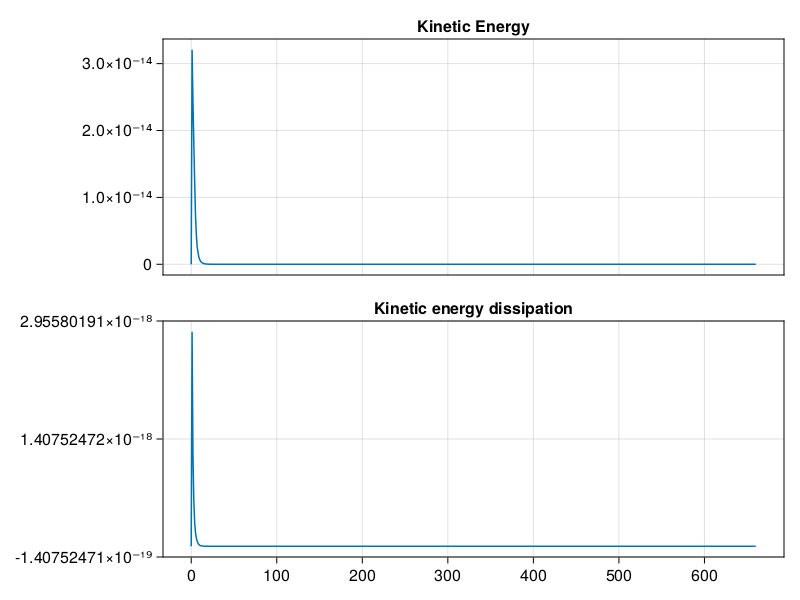

In [5]:
fig = Figure(size = (1000, 1000))
ax = [Axis(fig[i, 1]) for i ∈ 1:2]
lines!(ax[1], t, ∫Eₖ)
ax[1].title = "Kinetic Energy"
lines!(ax[2], t, ∫ϵ)
ax[2].title = "Kinetic energy dissipation"
linkxaxes!(ax[1], ax[2])
hidexdecorations!(ax[1], grid = false)
fig

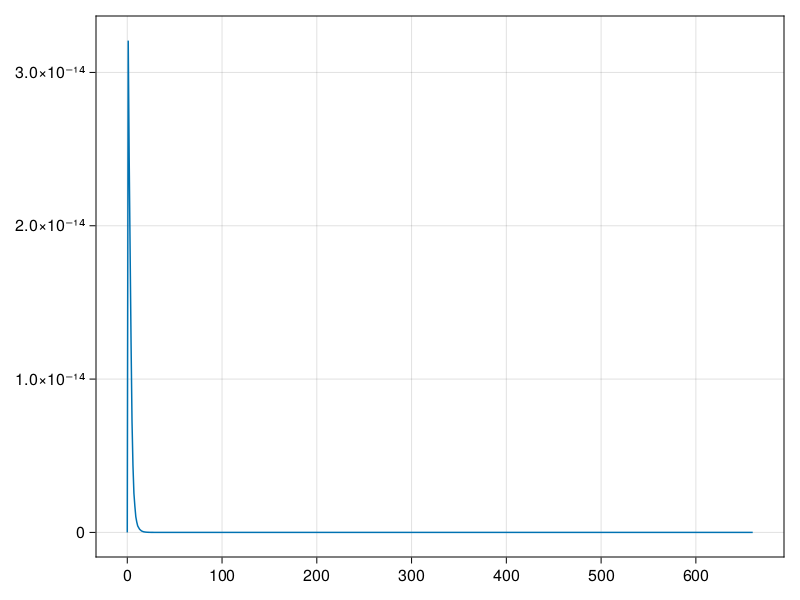

In [6]:
Φz = ∫Eₖ - ∫ϵ
lines(t, Φz)

In [7]:
en_ds = NCDataset(energetics)
t = en_ds[:time][:] ./ 60
∫Eb = en_ds[:∫Eb][:] 
∫Ep = en_ds[:∫Ep][:]
close(en_ds)

closed Dataset

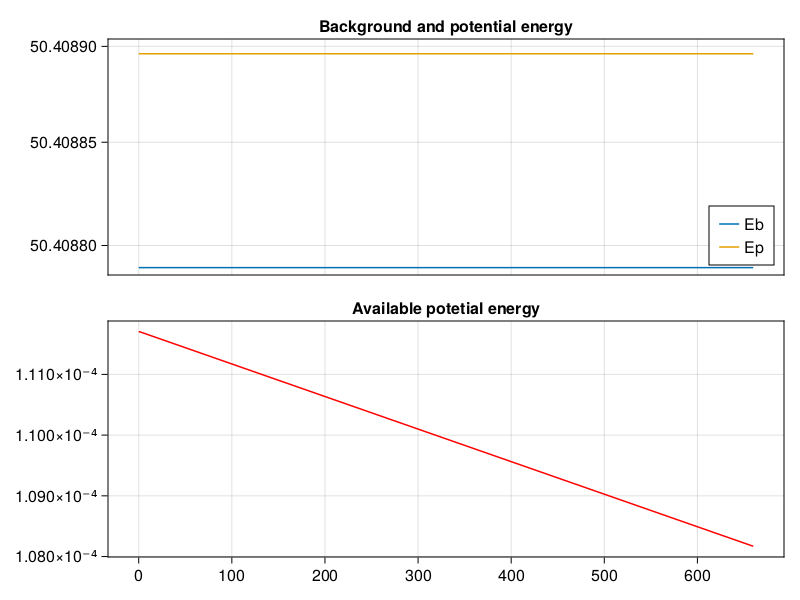

In [8]:
fig = Figure(size = (1000, 1000))
ax = [Axis(fig[i, 1]) for i ∈ 1:2]
lines!(ax[1], t, ∫Eb, label = "Eb")
lines!(ax[1], t, ∫Ep, label = "Ep")
hidexdecorations!(ax[1], grid = false)
ax[1].title = "Background and potential energy"
axislegend(ax[1], position = :rb)
lines!(ax[2], t, ∫Ep .- ∫Eb, color = :red)
hidexdecorations!(ax[1], grid = false)
ax[2].title = "Available potetial energy"
fig

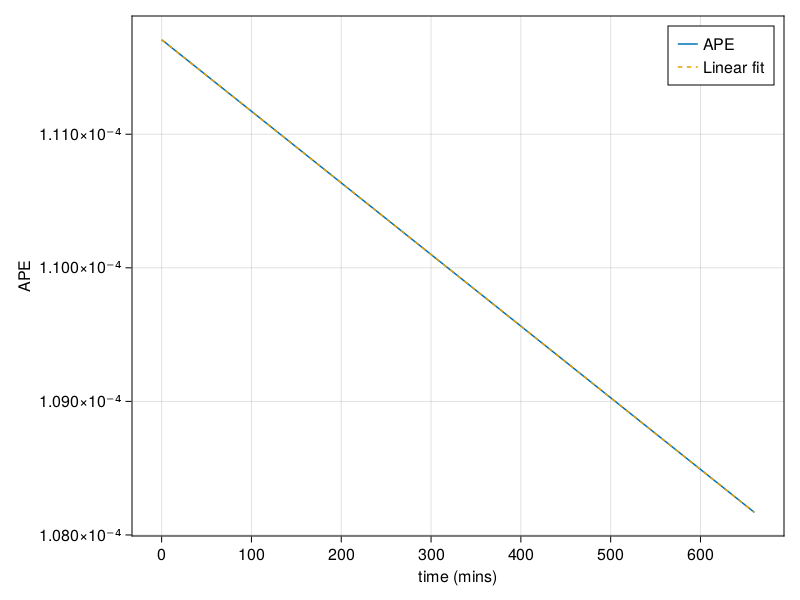

In [17]:
linear_fit = [ones(length(t)) t] \ (∫Ep .- ∫Eb)
fig = Figure(size = (250, 500))
ax = Axis(fig[1, 1], xlabel = "time (mins)", ylabel = "APE")
lines!(ax, t, ∫Ep .- ∫Eb, label = "APE")
lines!(ax, t, linear_fit[1] .+ linear_fit[2] .* t, label = "Linear fit", linestyle = :dash)
axislegend(ax)
fig

In [10]:
println("Slope is $(linear_fit[2])")

Slope is -5.361896996729718e-9


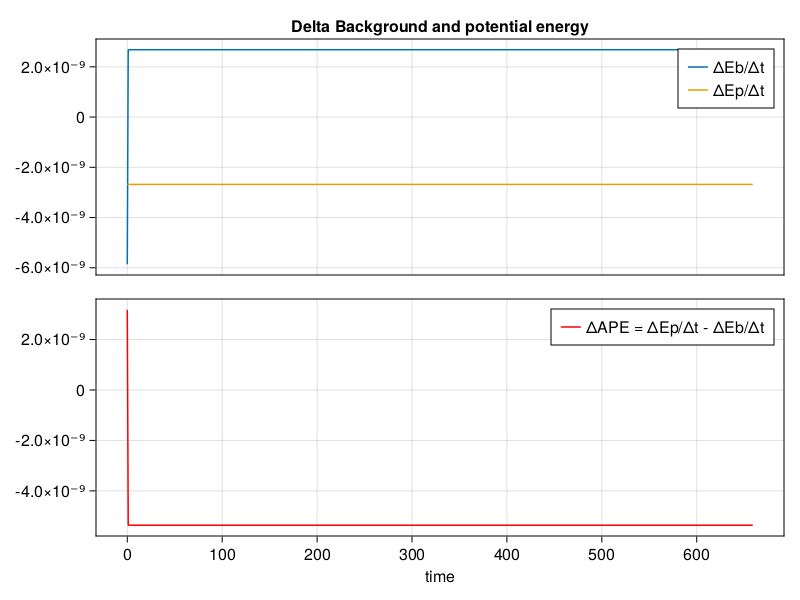

In [11]:
Δt = diff(t)
Δ∫Eb = diff(∫Eb) ./ Δt
Δ∫Ep = diff(∫Ep) ./ Δt
ΔAPE = Δ∫Ep .- Δ∫Eb
fig = Figure(size = (1000, 1000))
ax = [Axis(fig[i, 1], xlabel = "time") for i ∈ 1:2]
lines!(ax[1], t[1:end-1], Δ∫Eb, label = "ΔEb/Δt")
lines!(ax[1], t[1:end-1], Δ∫Ep, label = "ΔEp/Δt")
hidexdecorations!(ax[1], grid = false)
ax[1].title = "Delta Background and potential energy"
axislegend(ax[1])
lines!(ax[2], t[1:end-1], ΔAPE, color = :red, label = "ΔAPE = ΔEp/Δt - ΔEb/Δt")
axislegend(ax[2])
fig

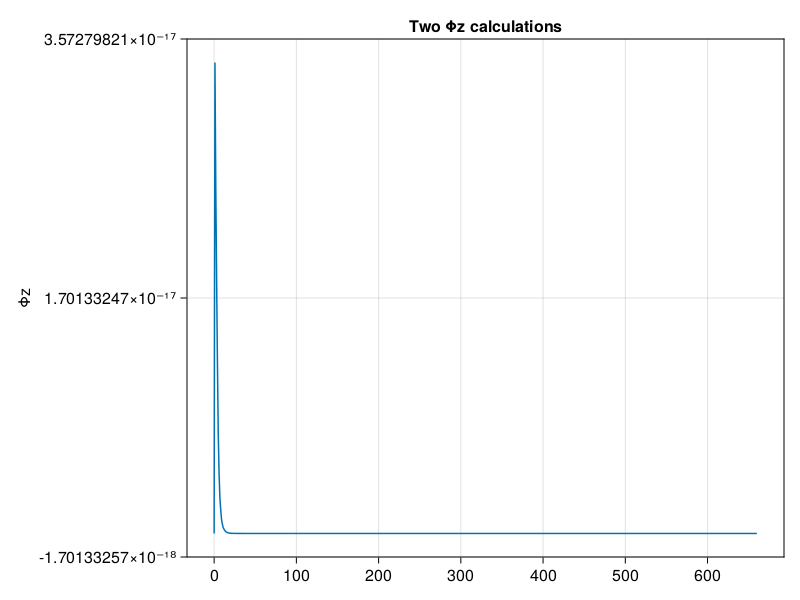

In [14]:
Φz = ∫Eₖ_unscaled .+ ∫ϵ
fig = Figure(size = (500, 500))
ax = Axis(fig[1, 1], title = "Two Φz calculations", ylabel = "Φz")
lines!(ax, t, Φz, label = "Φz = ∫Eₖ + ∫ϵ")
fig

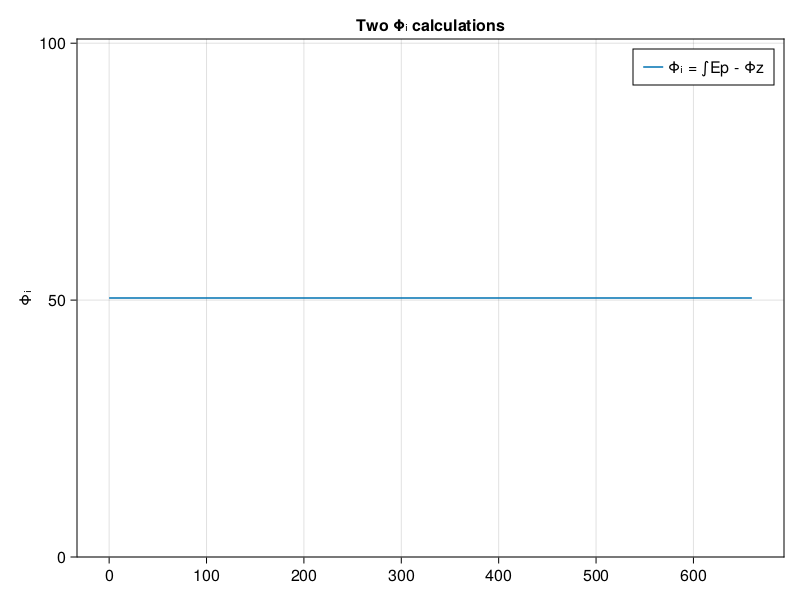

In [19]:
Φᵢ_post = ∫Ep - Φz
fig = Figure(size = (500, 500))
ax = Axis(fig[1, 1], title = "Two Φᵢ calculations", ylabel = "Φᵢ")
lines!(ax, t, Φᵢ_post, label = "Φᵢ = ∫Ep - Φz")
axislegend(ax)
fig

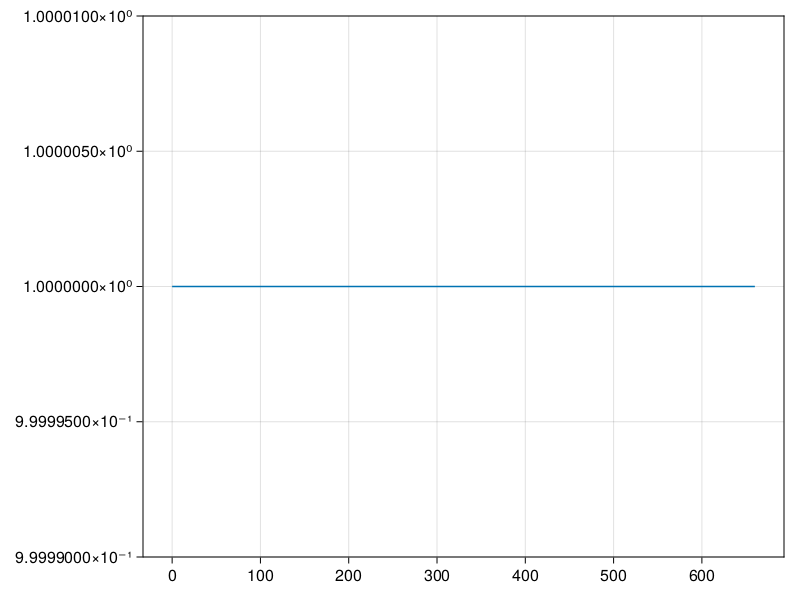

In [31]:
mixing_efficiency = @. (∫Eb - Φᵢ_post) / (∫Eb - Φᵢ_post + ∫ϵ)
fig, ax = lines(t, mixing_efficiency)
ylims!(ax, 1-1e-5, 1+1e-5)
fig

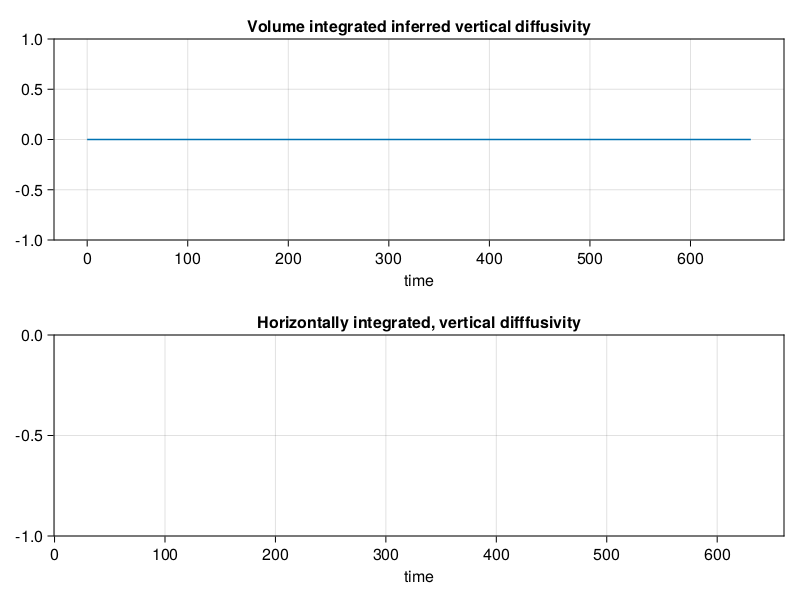

In [38]:
fig = Figure(size = (1000, 1000))
ax = [Axis(fig[i, 1], xlabel = "time") for i ∈ 1:2]
lines!(ax[1], t, ∫κᵥ, label = "∫κᵥ")
ax[1].title = "Volume integrated inferred vertical diffusivity"
colormap = cgrad(:viridis)[2:end-1]
lowclip = cgrad(:viridis)[1]
highclip = cgrad(:viridis)[end]
colorrange = (-1e-3, 1e-3)
heatmap!(ax[2], t, z_grid, ∫ₐκᵥ'; colormap, colorrange)
ax[2].title = "Horizontally integrated, vertical difffusivity"
fig